In [1]:
import os

In [2]:
%pwd

'c:\\Users\\RICH-FILES\\Desktop\\ml\\AI-powered-Bank-Product-Recommender-Chatbot\\research'

In [3]:

os.chdir("../.")

In [4]:
%pwd

'c:\\Users\\RICH-FILES\\Desktop\\ml\\AI-powered-Bank-Product-Recommender-Chatbot'

In [5]:
project_dir = "C:/Users/RICH-FILES/Desktop/ml/AI-powered-Bank-Product-Recommender-Chatbot"
os.chdir(project_dir)

In [6]:
from dataclasses import dataclass
from pathlib import Path

@dataclass(frozen=True)
class DataTransformationConfig:
    """
    Data Transformation Configuration
    """
    root_dir: Path
    transformed_data_file: Path
    customer_path: Path
    product_path: Path
    train_data_file: Path
    test_data_file: Path
    target_column: str
    joined_data_file: Path

In [7]:
from BankProducts.constants import *
from BankProducts.utils.common import read_yaml, create_directories

In [8]:
class ConfigurationManager:
    def __init__(
        self,
        config_filepath = CONFIG_FILE_PATH,    
        params_filepath = PARAMS_FILE_PATH,
        schema_filepath = SCHEMA_FILE_PATH,
        ):
       
        self.config = read_yaml(config_filepath)
        self.params = read_yaml(params_filepath)
        self.schema = read_yaml(schema_filepath)        
    
        create_directories([self.config.artifacts_root])
        
    def get_data_transformation_config(self)-> DataTransformationConfig:
        """
        Returns Data Transformation Configuration
        """
        config = self.config.data_transformation
        schema =  self.schema.target_column
        
        create_directories([self.config.artifacts_root])
        
        data_transformation_config = DataTransformationConfig(
            root_dir=Path(config.root_dir),
            transformed_data_file= Path(config.transformed_data_file),
            product_path= Path(config.product_path),
            customer_path= Path(config.customer_path),
            train_data_file= Path(config.train_data_file),
            test_data_file= Path(config.test_data_file),
            target_column= schema.name,
            joined_data_file= Path(config.joined_data_file)
            )
        
        
        return data_transformation_config
    

In [9]:



import os  
from BankProducts import logger
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


     


ImportError: DLL load failed while importing _multiarray_umath: The specified module could not be found.

ImportError: DLL load failed while importing _multiarray_umath: The specified module could not be found.

In [10]:
class DataTransformation:
    def __init__(self, config: DataTransformationConfig):
        self.config = config
        #self.data = None
        #self.transformed_data = None
        
    def join_datasets(self):
        """
        Join customer and product datasets"""    
        try:
            customer_data = pd.read_csv(self.config.customer_path)
            product_data = pd.read_csv(self.config.product_path)

            # Ensure the directory for saving exists
            output_dir = os.path.dirname(self.config.transformed_data_file)
            os.makedirs(output_dir, exist_ok=True)
            
            #print(customer_data['occupation'].unique()) # Check unique occupations
            
            
            
            def group_occupation(job):
                job = job.lower()

                if any(keyword in job for keyword in [
                    'engineer', 'architect', 'developer', 'planner', 'technologist',
                    'surveyor', 'scientist', 'analyst', 'chemist', 'mudlogger'
                ]):
                    return 'Engineering'

                elif any(keyword in job for keyword in [
                    'doctor', 'physiotherapist', 'oncologist', 'therapist', 'psychotherapist',
                    'homeopath', 'geneticist', 'embryologist', 'hospital', 'health',
                    'clinical', 'radiation', 'occupational', 'medical', 'pharmacist'
                ]):
                    return 'Healthcare'

                elif any(keyword in job for keyword in [
                    'teacher', 'lecturer', 'education', 'instructor', 'tutor', 'educational'
                ]):
                    return 'Education'

                elif any(keyword in job for keyword in [
                    'designer', 'artist', 'illustrator', 'ceramics', 'furniture', 'product designer',
                    'fashion', 'graphic', 'web', 'interior', 'fine artist', 'photographer'
                ]):
                    return 'Creative Design'

                elif any(keyword in job for keyword in [
                    'finance', 'financial', 'investment', 'trader', 'planner', 'cfo',
                    'actuary', 'underwriter', 'banker', 'comptroller'
                ]):
                    return 'Finance'

                elif any(keyword in job for keyword in [
                    'data', 'programmer', 'software', 'it', 'systems', 'naval architect',
                    'consultant', 'technology'
                ]):
                    return 'IT'

                elif any(keyword in job for keyword in [
                    'manager', 'administrator', 'officer', 'coordinator', 'executive',
                    'secretary', 'personal assistant', 'inspector', 'broker'
                ]):
                    return 'Administration'

                elif any(keyword in job for keyword in [
                    'journalist', 'writer', 'editor', 'broadcaster', 'media', 'production',
                    'television', 'film', 'radio'
                ]):
                    return 'Communications'

                elif any(keyword in job for keyword in [
                    'lawyer', 'barrister', 'legal', 'licensed conveyancer', 'tax', 'patent examiner'
                ]):
                    return 'Legal'

                elif any(keyword in job for keyword in [
                    'conservation', 'environmental', 'forester', 'nature', 'marine', 'horticulturist',
                    'land', 'tree surgeon'
                ]):
                    return 'Environment'

                elif any(keyword in job for keyword in [
                    'government', 'public', 'prison', 'trading standards', 'local government'
                ]):
                    return 'Public Sector'

                elif any(keyword in job for keyword in [
                    'sales', 'retail', 'buyer', 'merchandiser', 'estate agent'
                ]):
                    return 'Marketing'

                elif any(keyword in job for keyword in [
                    'catering', 'restaurant', 'hospitality', 'hotel'
                ]):
                    return 'Hospitality'

                elif any(keyword in job for keyword in [
                    'volunteer', 'charity', 'community', 'development worker'
                ]):
                    return 'Community Work'

                else:
                    return 'Other'
                
            # Apply the grouping function to create a new column
            customer_data['occupation_grouped'] = customer_data['occupation'].apply(group_occupation)



            
            customer_data['existing_products'] = customer_data['existing_products'].str.split(',')  # Split the existing_products column into a list
            
            df_exploded = customer_data.explode('existing_products') # 

            # Join operation
            joined_data = pd.merge(df_exploded, product_data, how="left",
                                left_on="existing_products", right_on="product_name")
            
            #drop unnecessary columns
            joined_data = joined_data.drop(columns=['existing_products'], errors='ignore')  # Drop columns which are not needed if it exists
            
            #check the dataset head
            print(joined_data.head())
            
            
            # Save the joined data
            try:   
                joined_data.to_csv(self.config.joined_data_file, index=False)
                logger.info(f"Joined dataset saved to {self.config.joined_data_file}")
                print(f"Joined dataset saved to {self.config.joined_data_file}")
            except Exception as e:
                logger.error(f"Error saving joined dataset: {e}")
                print(f"Error saving joined dataset: {e}")
            
            return joined_data

        except Exception as e:
            logger.error(f"Error in joining datasets: {e}")
            print(f"Error in joining datasets: {e}")
            raise e
    def transform_data(self):
        """
        Transform the data as per the requirements
        """
        
        # Load the data
        data = pd.read_csv(self.config.joined_data_file)
        # Perform transformations
        print(data.head())
        
        print(":"*100)
        
        data.info()
        print(":"*100)
        
        data.describe()
        print(":"*100)
        print(data.columns)
        print(":"*100)
        
        #drop na
        data.dropna(inplace=True
                            )
        #check null values
        print(data.isnull().sum())
        
        #check the number of  values in the target column
        print(data[self.config.target_column].value_counts())
        
        #resize the dataset to match the number of rows in the target column
        data = data[data[self.config.target_column].notnull()]
        
        #drop unnecessary columns
        data = data.drop(columns=['customer_id','name', 'eligibility', 'description', 'financial_goals', 'occupation', 'occupation_grouped'], errors='ignore')
        
        # print the first 5 rows of the data
        data.head()
        
        #remove duplicates
        data.drop_duplicates(inplace=True)
        
        
        
        #plot "product_name" histogram based of gender using seaborn
        plt.figure(figsize=(10, 6))
        ax = sns.histplot(data=data, x= self.config.target_column, hue='gender', multiple='stack')

        # Add separated count labels above each segment
        for container in ax.containers:
            # Add offset so overlapping labels are vertically separated
            for bar in container:
                height = bar.get_height()
                if height > 0:
                    ax.text(
                        bar.get_x() + bar.get_width() / 2,
                        bar.get_y() + height / 2,  # Place label at the middle of the segment
                        f'{int(height)}',
                        ha='center',
                        va='center',
                        fontsize=9,
                        color='white',  # or 'black' depending on your bar color
                        weight='bold'
                    )


        plt.title("Product Name Histogram by Gender")
        plt.tight_layout()
        plt.show()
                    
        # drop the gender
        data = data.drop(columns=['gender'])
        
        #plot "age" histogram
        plt.figure(figsize=(10,6))
        plt.hist(data["age"], bins=10, edgecolor='black', color= "orange", alpha=0.7)
        plt.title("Age Frequency Distribution")
        plt.xlabel("Age")
        plt.ylabel("Frequency")
        plt.savefig("age_histogram.png")
        
    
        
        #plot "product_name" vs "age" bar plot
        plt.figure(figsize=(10,6))
        plt.bar(data["product_name"], data["age"], color="green")
        plt.title("Product Name vs Age Bar Plot")
        plt.xlabel("Product Name")
        plt.ylabel("Age")
        plt.savefig("product_name_vs_age_bar_plot.png")
        
        #feature selection
        # If it's a categorical variable like a string, correlation won't work correctly
        correlation_matrix = data.select_dtypes(include= ['float64', 'int64']).corr()
        
        plt.figure(figsize=(10, 6))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
        plt.title("Correlation Matrix")
        plt.show()
        plt.savefig('correlation_matrix.png')
    
        # Save the data to a CSV file to the specified path
        os.makedirs(os.path.dirname(self.config.transformed_data_file), exist_ok=True)
        data.to_csv(self.config.transformed_data_file, index=False)
        logger.info(f"Transformed data saved to {self.config.transformed_data_file}")
        print(f"Transformed data saved to {self.config.transformed_data_file}")
        
        return data
      
    def split_data(self):
        data =  pd.read_csv(self.config.transformed_data_file)  
        
        #  splitting data into train and test sets
        train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
        
        # print the first 5 rows of the train and test data
        print("Train Data:")
        print(train_data.head())
        
        print("Test Data:") 
        print(test_data.head())
        
        
        #save train_data and test_data to csv files
        train_data.to_csv(os.path.join(self.config.train_data_file), index=False)
        test_data.to_csv(os.path.join(self.config.test_data_file), index=False)
        
        logger.info(f"Train and test sets saved to {self.config.train_data_file} and {self.config.test_data_file}")
        print(f"Train and test sets saved to {self.config.train_data_file} and {self.config.test_data_file}")
        # Log the shapes of the train and test sets
        logger.info(f"Train set shape: {train_data.shape}, Test set shape: {test_data.shape}")
        #print the shapes of the train and test sets
        print(f"Train set shape: {train_data.shape}, Test set shape: {test_data.shape}")
        # Log the shapes of the train and test sets
        return train_data, test_data    
        
        
      

[2025-05-31 22:23:30,043: INFO: common: yaml file: config\config.yaml loaded successfully]
[2025-05-31 22:23:30,060: INFO: common: yaml file: params.yaml loaded successfully]
[2025-05-31 22:23:30,074: INFO: common: yaml file: schema.yaml loaded successfully]
[2025-05-31 22:23:30,080: INFO: common: created directory at: artifacts]
[2025-05-31 22:23:30,086: INFO: common: created directory at: artifacts]
                            customer_id          name  age  gender  \
0  7bb08efe-5222-4698-8540-4de1f56c23bb   Marissa Roy   24  Female   
1  7bb08efe-5222-4698-8540-4de1f56c23bb   Marissa Roy   24  Female   
2  7bb08efe-5222-4698-8540-4de1f56c23bb   Marissa Roy   24  Female   
3  01e4e9c0-008e-443f-a0d4-ee1e27392941  Peter Hughes   25    Male   
4  01e4e9c0-008e-443f-a0d4-ee1e27392941  Peter Hughes   25    Male   

                  occupation  annual_income marital_status  credit_score  \
0     Recruitment consultant       66387.36        Married           774   
1     Recruitment cons

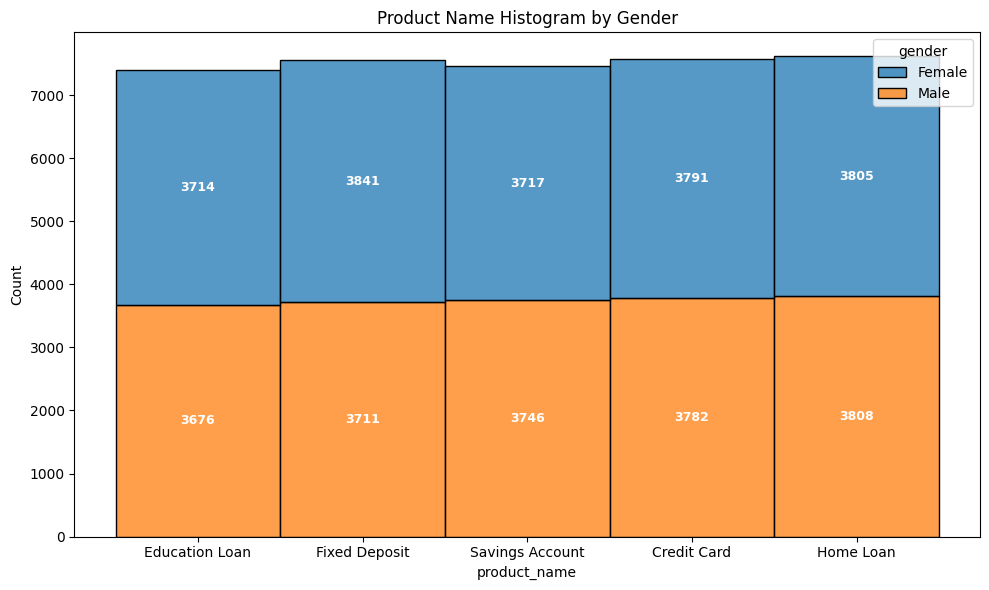

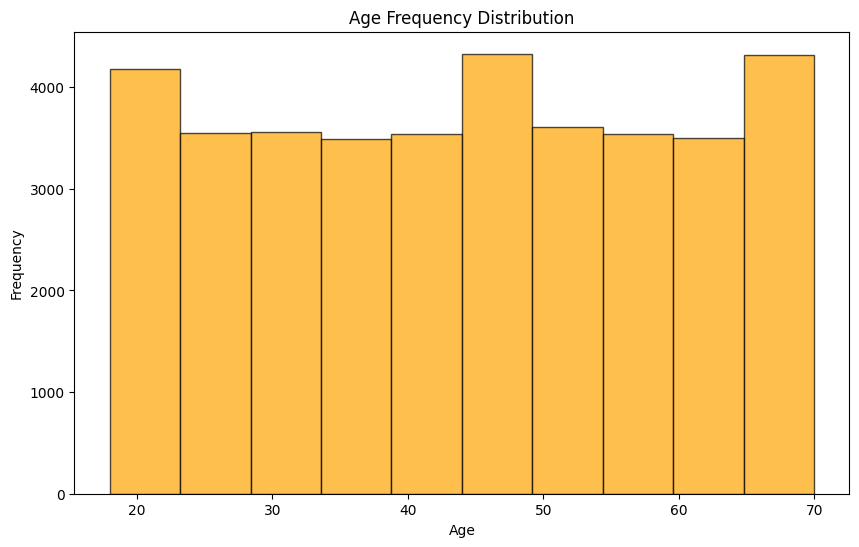

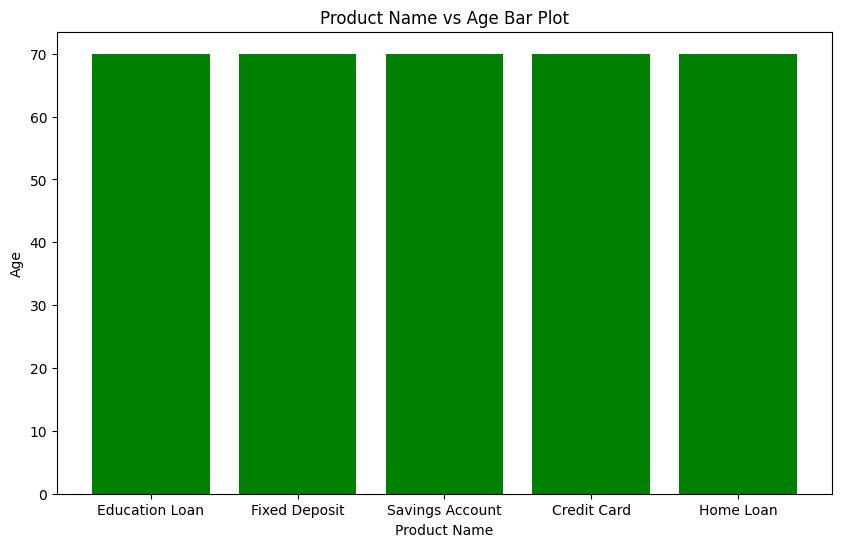

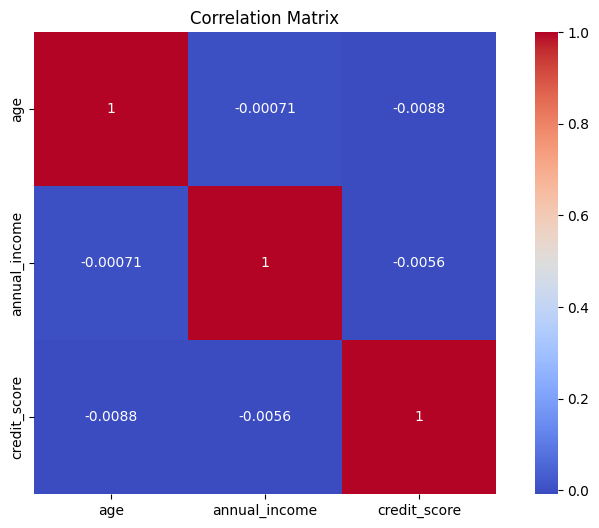

[2025-05-31 22:26:05,029: INFO: 1107626428: Transformed data saved to artifacts\data_transformation\transformed_data.csv]
Transformed data saved to artifacts\data_transformation\transformed_data.csv
Train Data:
       age  annual_income marital_status  credit_score    product_name
32424   35      192313.99       Divorced           396  Education Loan
20687   58       97386.32       Divorced           716  Education Loan
36716   30      157317.72       Divorced           535   Fixed Deposit
35457   18      150524.29       Divorced           801   Fixed Deposit
26036   26      104361.23       Divorced           417       Home Loan
Test Data:
       age  annual_income marital_status  credit_score     product_name
23001   26       71018.03         Single           633   Education Loan
7729    50      126405.05        Married           346  Savings Account
268     44       76394.50        Married           845      Credit Card
27915   22      130109.24        Married           834        Ho

<Figure size 640x480 with 0 Axes>

In [11]:

try:
    config = ConfigurationManager()
    data_transformation_config = config.get_data_transformation_config()
    
    data_transformation = DataTransformation(config=data_transformation_config)
    
    data_transformation.join_datasets()
    data_transformation.transform_data()
    data_transformation.split_data()
    

except Exception as e:
    print(f"An error occurred: {e}")
    
    